## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

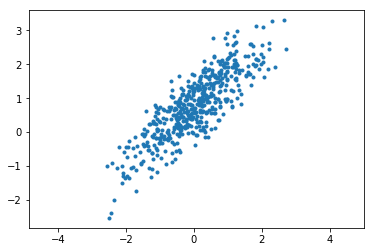

In [17]:
plt.axis('equal')
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
def cal_loss(predictions, target):
    n = len(target) # n elements
    cost = (1/n) * np.sum(np.square(predictions-target)) # calculating MSE
    return cost


In [18]:
def gradient_descent(x_train, y_train, learning_rate=10**-4, iterations=100):
    # initializing value a, b
    a = np.random.rand()
    b = 2*np.random.rand()
    
    data_size = len(x_train)
    preds = [a + b*x for x in x_train] # initial prediction
    global loss
    loss = []
    
    for training in range(iterations):
        grad_a, grad_b = 0, 0
        for i in range(data_size): # calculating gradient_a, gradient_b
            cost_i = preds[i] - y_train[i]
            grad_a = grad_a + cost_i
            grad_b = grad_b + cost_i*x_train[i]
            
        a = a - learning_rate * (2/data_size) * grad_a
        b = b - learning_rate * (2/data_size) * grad_b
        preds = [a + b*x for x in x_train] # renew predictions
        loss.append(cal_loss(preds, y_train))
        
    return a, b

In [91]:
loss = []
intercept, slope = 0, 0
learning_rate = 5e-4
iterations = 5000

def model(data):
    # assume the equation => y = a + bx
    a, b = gradient_descent(x_train, y_train, learning_rate, iterations)
    global intercept, slope
    intercept, slope = a, b
    return [x*b + a for x in data]


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [92]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [93]:
y_pred = model(x_test)

# calculating MSE of testing data
test_size = len(x_test)
MSE = (1/test_size) * np.sum(np.square(y_pred - y_test))

learning rate 0.0005
iterations    5000


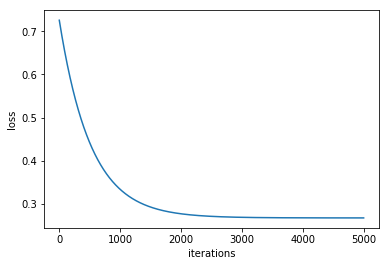

In [94]:
print("learning rate {}".format(learning_rate))
print("iterations    {}".format(iterations))

plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(iterations), loss)

intercept     0.7826253763957964
weight        0.8230946906820291
MSE           0.06794883148135622


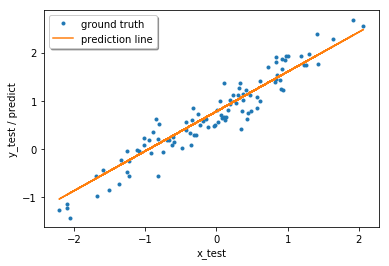

In [96]:
print("intercept     {}".format(intercept))
print("weight        {}".format(slope))
print("MSE           {}".format(MSE))

plt.xlabel('x_test')
plt.ylabel('y_test / predict')
plt.plot(x_test, y_test, '.', label='ground truth')
plt.plot(x_test, y_pred, '-', label='prediction line')
info = plt.legend(loc='best', shadow='True')